**B.Game with application scenarios: Mining Pool Selection (Liu et. al, 2018)**

*Backgrounds:*

In blockchain networks adopting the proof-of-work schemes, the monetary incentive is introduced by the Nakamoto consensus protocol to guide the behaviors of the full nodes (i.e., block miners) in the process of maintaining the consensus about the blockchain state. The block miners have to devote their computation power measured in hash rate in a crypto-puzzle solving competition to win the reward of publishing (a.k.a.,
mining) new blocks. Due to the exponentially increasing difficulty of the crypto-puzzle, individual block miners tends to join mining pools, i.e., the coalitions of miners, in order to reduce the income variance and earn stable profits. 

In this case, we will study the dynamics of mining pool selection in a blockchain network, where mining pools may choose arbitrary block mining strategies. We identify the hash rate and the block propagation delay as two major factors determining the outcomes of mining competition, and then model the strategy evolution of the individual miners as an evolutionary game.

*Problem Formulation:*

*A. Financially Incentivized Block Mining with Proof-of-Work*

We consider a blockchain network adopting the Nakamoto consensus based on Proof-of-Work (PoW). Assume that the network is composed of a large population of $N$ individual miners. For each miner, the chance of mining a new block is in proportion to the ratio between its individual hash rate for solving the crypto-puzzles in PoW and the total hash rate in the network. According to the Nakamoto consensus protocol, the miner of each confirmed block receives a fixed amount of blockchain tokens from the new block's coinbase and a flexible amount of transaction fees as the reward for maintaining the blockchain's consensus and approving the transactions. We consider that the individual miners organize themselves into a set of $M$ mining pools, namely, $\mathcal{M}=\{1,2, \ldots, M\}$ We further consider that each mining pool may set different requirement on the hash rate contributed by an individual miner trying to join the pool. Let $\omega_{i}$ denote the individual hash rate required by pool $i(i \in \mathcal{M})$, and $x_{i}$ denote the miners' population fraction in pool $i$. Then, the probability for pool $i$ to mine a block in one consensus round can be expressed as (1):
$$
\operatorname{Pr}_{i}^{\operatorname{mine}}(\mathrm{x}, \boldsymbol{\omega})=\frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}}
$$
where $\boldsymbol{\omega}=\left[\omega_{1}, \ldots, \omega_{M}\right]^{\top}, \mathbf{x}=\left[x_{1}, \ldots, x_{M}\right]^{\top}, \sum_{i \in \mathcal{M}} x_{i}=$ 1 and $\forall i, x_{i} \geq 0$

After successfully mining a block, pool $i$ broadcasts the mined block to its neighbors in the hope that it will be propagated to the entire network and confirmed as the new head block of the blockchain. However, in the situation where more than one mining pool discover a new block at the same time, only the block that is first disseminated to the network will be confirmed by the network. All of the rest candidate blocks will be discarded (orphaned). According to the empirical studies in, the block propagation time is mainly determined by two factors, namely, the transmission delay over each link and the transaction verification time at each relaying node. For a block of size $s$, the transmission delay can be modeled as $\tau_{p}(s)=\frac{s}{\gamma c}[4]$, where $\gamma$ is a network scale-related parameter, and $c$ is the average effective channel capacity of each link. On the other hand, since verifying a transaction requires roughly the same amount of computation, the block verification time can be modeled as a linear function $\tau_{v}(s)=b s$, where $b$ is a parameter determined by both the network scale and the average verification speed of each node. Then, the average propagation time for a block of size $s$ can be expressed as(2):

$$
\tau(s)=\tau_{p}(s)+\tau_{v}(s)=\frac{s}{\gamma c}+b s
$$

Based on (2), the incidence of abandoned (i.e., orphaning) a valid block due to the propagation delay can be modeled as a Poisson process with mean $1 / T$, where $T$ is maintained by the network as a fixed average mining time (e.g., $600 \mathrm{~s}$ in Bitcoin) $[4]$. Then, the probability of orphaning a valid candidate block of size $s$ in one consensus round is(3):

$$
\operatorname{Pr}^{\text {orphan }}(s)=1-e^{-\tau(s) / T}=1-e^{-\left(\frac{s}{\gamma c}+b s\right) / T}
$$

From (1) and (3), the probability for pool $i$ to ultimately win a block mining race with a block of size $s_{i}$ can be derived as (4):

$$
\operatorname{Pr}_{i}^{\operatorname{win}}\left(\mathrm{x}, \boldsymbol{\omega}, s_{i}\right)=\frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}} e^{-\left(\frac{x_{i}}{\gamma c}+b s_{i}\right) / T}
$$

We assume that the transactions in the blockchain network are issued with an invariant rate of transaction fees. When the transactions are of fixed size, pool $i$ 's mining reward from transaction fee collection can also be modeled as a linear function of the block size $s_{i}$. Let $\rho$ denote the price of transaction in a unit block size [5]. Then, the reward of pool $i$ from transaction fees can be written as $\rho s_{i}$. Let $R$ denote the fixed reward from the new block's coinbase. Then, the expected reward for pool $i$ can be expressed as follows (5):

$$
E\left\{r_{i}\left(\mathbf{x}, \boldsymbol{\omega}, s_{i}\right)\right\}=\left(R+\rho s_{i}\right) \frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}} e^{-\left(\frac{s_{i}}{\gamma_{i}}+b s_{i}\right) / T}
$$

Since the process of crypto-puzzle solving in $\mathrm{PoW}$ is computationally intensive, the rational miners also have to consider the cost of power consumption due to hash computation in the block mining process. Noting that the new blocks are discovered with a roughly fixed time interval, we denote the energy price for generating a unit hash query rate during that time interval by $p$. Then, we can obtain the expected payoff for an individual miner in pool $i$ as follows (6):

$$
y_{i}\left(\mathbf{x}, \boldsymbol{\omega}, s_{i}\right)=\frac{R+\rho s_{i}}{N x_{i}} \frac{\omega_{i} x_{i}}{\sum_{j=1}^{M} \omega_{j} x_{j}} e^{-\left(\frac{x_{i}}{\gamma c}+b s_{i}\right) / T}-p \omega_{i}
$$

*B. Mining Pool Selection as an Evolutionary Game*

Consider that the individual miners are rational and aim to
maximize their net payoff given in (6). Then, it is nature to
model the process of mining pool selection in the population of individual miners as an evolutionary game. Mathematically, we can define the evolutionary game for mining pool selection as a 4-tuple: $\mathcal{G}=\left\langle\mathcal{N}, \mathcal{M}, \mathrm{x},\left\{y_{i}\left(\mathbf{x} ; \boldsymbol{\omega}, s_{i}\right)\right\}_{i \in \mathcal{M}}\right\rangle$, where
- $\mathcal{N}$ is the population of individual miners, $|\mathcal{N}|=N$.
- $\mathcal{M}=\{1,2, \ldots, M\}$ is the set of mining pools, and $\left(w_{i}, s_{i}\right)$ is the mining strategy preference of each pool $i \in \mathcal{M}$
- $\mathrm{x}=\left[x_{1}, \ldots, x_{M}\right]^{\top} \in \mathcal{X}$ is the vector of the population states, where $x_{i}$ represents the fraction of population that choose mining pool $i . \mathcal{X}=\left\{\mathrm{x} \in \mathbb{R}_{+}^{M}: \sum_{i \in \mathcal{M}} x_{i}=1\right\}$
- $\left\{y_{i}\left(\mathbf{x} ; \boldsymbol{\omega}, s_{i}\right)\right\}_{i \in \mathcal{M}}$ is the set of individual miner's payoff in each mining pool. $y_{i}\left(\mathrm{x} ; \boldsymbol{\omega}, s_{i}\right)$ is given by $(6)$.
We note that $\omega_{i}$ and $s_{i}$ form the predetermined mining strategy of pool $i$. Given a population state $\mathrm{x} \in \mathcal{X}$, we can derive the average payoff of the individual miner in $\mathcal{N}$ based on (6) as follows (7):

$$
\bar{y}(\mathrm{x})=\sum_{i=1}^{M} y_{i}\left(\mathrm{x} ; \boldsymbol{\omega}, s_{i}\right) x_{i}
$$

Then, by the pairwise proportional imitation protocol $[7]$, the replicator dynamics for the evolution of the population states can be expressed by the following system of Ordinary Differential Equations (ODEs) $\forall i \in \mathcal{M}$ (8):
$$
\dot{x}_{i}(t)=f_{i}\left(\mathrm{x}(t) ; \boldsymbol{\omega}, s_{i}\right)=x_{i}(t)\left(y_{i}\left(\mathrm{x}(t) ; \boldsymbol{\omega}, s_{i}\right)-\bar{y}(\mathrm{x}(t))\right)
$$
where $\dot{x}_{i}(t)$ represents the growth rate of the size of pool $i$ with respect to time $t$.

We are interested in the Nash Equilibria (NE) of game $\mathcal{G}$ described by $(8)$. Let $Y(\mathrm{x})$ denote the vector of individual payoffs for all the mining pools, $Y(\mathrm{x})=\left[y_{1}(\mathrm{x}), \ldots, y_{M}(\mathrm{x})\right]^{\top}$ and let $\mathcal{E}(Y)$ denote the set of $\mathrm{NE}$ in game $\mathcal{G}$. Then, $\mathcal{E}(Y)$ can be defined as follows:

Definition 1 (NE). A population state $\mathrm{x}^{*} \in \mathcal{X}$ is an NE of the evolutionary game $\mathcal{G}$, i.e., $\mathrm{x}^{*} \in \mathcal{E}(Y)$, if for all feasible population state $\mathrm{x} \in \mathcal{X}$ the following inequality holds (9)

$$
\left(\mathrm{x}-\mathrm{x}^{*}\right)^{\top} Y\left(\mathrm{x}^{*}\right) \leq 0
$$

It is straightforward that an $\mathrm{NE}$ is a fixed point of the replicator dynamics given by $(8)$, namely, $\forall i \in \mathcal{M}, f_{i}\left(\mathrm{x}(t) ; \boldsymbol{\omega}, s_{i}\right)=$ $0[7]$. Then, we need to further investigate the stability of an $\mathrm{NE}$ state $\mathrm{x}^{*} \in \mathcal{E}(Y)$ for pool selection. Suppose that there exists another population state $\mathrm{x}^{\prime}$ trying to invade state $\mathrm{x}^{*}$ by attracting a small share $\epsilon \in(0,1)$ in the population of miners to switch to $\mathrm{x}^{\prime}$. Then, $\mathrm{x}^{\prime}$ is an Evolutionary Stable Strategy (ESS) if the following condition holds for all $\epsilon \in(0, \bar{\epsilon})$ (10):

$$
\sum_{i \in \mathcal{M}} x_{i}^{*} y_{i}\left((1-\epsilon) \mathrm{x}^{*}+\epsilon \mathrm{x}^{\prime}\right) \geq \sum_{i \in \mathcal{M}} x_{i}^{\prime} y_{i}\left((1-\epsilon) \mathrm{x}^{*}+\epsilon \mathrm{x}^{\prime}\right)
$$

Based on $(10)$, we can formally define the ESS as follows.
Definition 2 (ESS $[8]) .$ A population state $\mathrm{x}^{*}$ is an ESS of game $\mathcal{G}$, if there exists a neighborhood $\mathcal{B} \in \mathcal{X}$, such that $\forall \mathrm{x} \in \mathcal{B}-\mathrm{x}^{*}$, the condition $\left(\mathrm{x}-\mathrm{x}^{*}\right)^{\top} Y\left(\mathrm{x}^{*}\right)=0$ implies that (11)

$$
\left(\mathrm{x}^{*}-\mathrm{x}\right)^{\top} Y(\mathrm{x}) \geq 0
$$

<div align="center">
<img src="https://i.loli.net/2021/09/10/KitpUDV9fCMQ24W.png" >
    </div>



In Algorithm 1 1. we describe the strategy evolution of the $N$ individual miners following the revision protocol of pairwise proportional imitation [9]. When receiving a signal for strategy revision of choosing a new pool, an individual miner switches from it current pool to the new pool probabilistically according to $(12)$. As the population size increases, the pairwise proportional imitation will a symptotically lead to the replicator dynamics described by the ODEs in (8).

*Evolution Analysis:*

In this section, we conduct several numerical simulations and provide the performance evaluation of the individual miners' pool-selection strategies in different situations. We first consider a blockchain network with $N=5000$ individual miners, which evolve to form two mining pools (i.e., $M=2$ ). For the purpose of demonstration, we set the block generation parameters as $\lambda=1 / 600, \frac{1}{\gamma c}+b=0.005, R=1000, \rho=2$ and $p=0.01$. We also set the initial population state as $\mathrm{x}=[0.75,0.25]$. We first consider that the two pools adopt their mining strategies with the same block size, $s_{1}=s_{2}=$ 100 , and different computation power contribution, $\omega_{1}=30$ and $\omega_{2}=20 .$ By Theorem 2 . we know that such strategy adaptation satisfies the condition for an ESS in the interior of the simplex $\mathcal{X}$. Figure 1(a) demonstrates the evolution of the miners' pool-selection strategies. According to Figure $1(b)$, the strategies converge to a global ESS of $(0.4,0.6)$, which is in accordance with our theoretical prediction. We also observe that relatively fewer miners choose to join the pool requiring a higher hash rate (i.e., pool 1) at the ESS. This is because a higher computation power requirement will lead to an increase in the mining cost, which exceeds the profit improvement that the miner can obtain in that pool.

*Code Implementation:*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

class PoolSelectionAgent(Agent):

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.states = self.model.initial_state
        self.lbd = 1 / 600;     self.propagation = 0.005
        self.R = 1000;          self.rou = 2
        self.p = 0.01;          self.block_size = [100, 100]
        self.w = [30, 20];      self.population = self.model.num_agent * self.model.initial_state
        self.T = 600

    def sum(self):
        sum_value = 0
        for i in range(0, self.model.width):
            sum_value += self.w[i] * self.states[i]
        return sum_value

    def generate_probability(self, current_pool, new_pool):
        j = new_pool[0]; o = current_pool[0]
        # payoff for the potential pool
        yj_p1 = (self.R + self.rou * self.block_size[j]) / (self.model.num_agent * self.states[j])
        yj_p2 = (self.w[j] * self.states[j]) / self.sum()
        yj_p3 = math.exp(-self.block_size[j] * (self.propagation) / self.T)
        yj_p4 = self.p * self.w[j]
        yj = yj_p1 * yj_p2 * yj_p3 - yj_p4
        # payoff for the origin pool
        yo_p1 = (self.R + self.rou * self.block_size[o]) / (self.model.num_agent * self.states[o])
        yo_p2 = (self.w[o] * self.states[o]) / self.sum()
        yo_p3 = math.exp((-self.block_size[o] * (self.propagation)) / self.T)
        yo_p4 = self.p * self.w[o]
        yo = yo_p1 * yo_p2 * yo_p3 - yo_p4
        probability = self.states[j] * max((yj - yo), 0)

        return probability

    def update_state(self):
        states = []
        for cell in self.model.grid.coord_iter():
            cell_content, x, y = cell
            agent_count = len(cell_content)
            states.append(agent_count)
        states = np.array(states)
        states = states / self.model.num_agent
        self.states = states
        self.model.state_list = states.tolist()


    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        current_pool = self.pos
        new_pool = self.random.choice(possible_steps)
        SwitchProbability = self.generate_probability(current_pool=current_pool, new_pool=new_pool)
        # print("SwitchProbability: ", SwitchProbability)

        if current_pool == new_pool:
            pass
        else:
            if random.random() < SwitchProbability:
                self.model.grid.move_agent(self, new_pool)
            else:
                pass
        self.update_state()

    def step(self):
        self.move()

class PoolSelectionModel(Model):

    def __init__(self, N, width, height, initial_state):
        super().__init__()
        self.running = True
        self.num_agent = N
        self.grid = MultiGrid(width, height, False)
        self.schedule = RandomActivation(self)
        self.initial_state = initial_state
        self.width = width; self.height = height
        self.state_list = [initial_state]

        for i in range(self.num_agent):
            a = PoolSelectionAgent(i, self)
            self.schedule.add(a)
            # Add the agents to a random grid cell based on the settings
            x = np.random.choice([i for i in range(width)], p=self.initial_state)
            y = height - 1
            self.grid.place_agent(a, (x, y))
        # self.datacollector = DataCollector()

    def step(self):
        self.schedule.step()

if __name__ == '__main__':
    initial_state = [0.75, 0.25]
    iteration_number = 500
    model = PoolSelectionModel(N=5000, width=2, height=1,
                               initial_state=np.array(initial_state))
    state_list = [initial_state]
    for i in range(500):
        model.step()
        state_list.append(model.state_list)

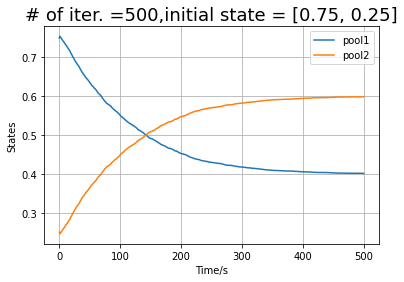

In [ ]:
# Visualization
state_list = np.array(state_list)

fig,ax = plt.subplots()
ax.plot(state_list[:,0], label='pool1')
ax.plot(state_list[:,1], label='pool2')

ax.set_xlabel('Time/s')
ax.set_ylabel('States')
ax.set_title('# of iter. =' + str(iteration_number) + ',' + 'initial state = ' + str(initial_state), fontsize=18)
ax.grid()
ax.legend();